In [2]:
from nipype import Node, Workflow
from nipype.interfaces import fsl
from os.path import abspath
import os

In [3]:
dwi_dir = abspath('data/openfmri/ds000009/sub-01/dwi/')

dwi = os.path.join(dwi_dir, 'sub-01_dwi.nii.gz')
bval = os.path.join(dwi_dir, 'sub-01_dwi.bval')
bvec = os.path.join(dwi_dir, 'sub-01_dwi.bvec')

In [4]:
bet = Node(fsl.BET(in_file=dwi), name='bet')

190111-15:18:17,801 nipype.interface WARNING:
	 FSLOUTPUTTYPE environment variable is not set. Setting FSLOUTPUTTYPE=NIFTI


In [5]:
eddy = Node(fsl.Eddy(in_file=dwi,
                     in_bvec=bvec,
                     in_bval=bval), name='eddy')

190111-15:18:17,813 nipype.interface WARNING:
	 FSLOUTPUTTYPE environment variable is not set. Setting FSLOUTPUTTYPE=NIFTI


In [6]:
fit = Node(fsl.DTIFit(bvals=bval), 'dtifit')

190111-15:18:17,824 nipype.interface WARNING:
	 FSLOUTPUTTYPE environment variable is not set. Setting FSLOUTPUTTYPE=NIFTI


In [7]:
wf = Workflow(name='dumbdti', base_dir=abspath('output/working_dir'))
wf.connect(bet,'mask_file', eddy, 'in_mask')
wf.connect(eddy, 'out_corrected', fit, 'dwi')
wf.connect(eddy, 'out_rotated_bvecs', fit, 'bvecs')

190111-15:18:18,437 nipype.workflow INFO:
	 Generated workflow graph: /Users/nielsond/code/coco2019/workflow_example/output/working_dir/dumbdti/workflow_graph.png (graph2use=hierarchical, simple_form=True).


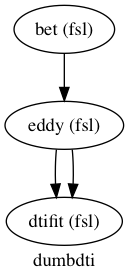

In [8]:
wf.write_graph("workflow_graph.dot")
from IPython.display import Image
Image(filename="output/working_dir/dumbdti/workflow_graph.png")

190111-15:18:18,786 nipype.workflow INFO:
	 Generated workflow graph: /Users/nielsond/code/coco2019/workflow_example/output/working_dir/dumbdti/graph.png (graph2use=flat, simple_form=True).


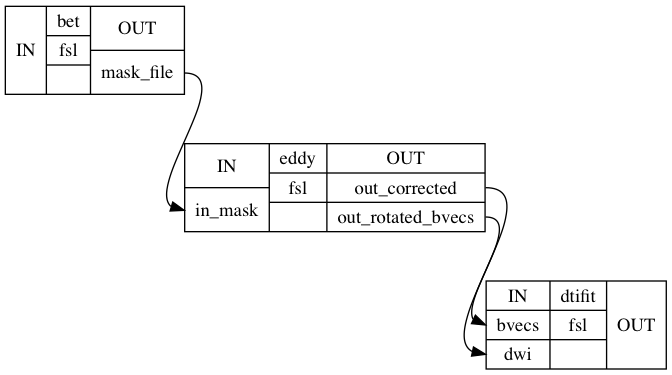

In [9]:
wf.write_graph(graph2use='flat')
from IPython.display import Image
Image(filename="output/working_dir/dumbdti/graph_detailed.png")